# Classification Example

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np

## Load dataset

Dataset of hand-written digits.

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

## Extract data from dataset

In [4]:
X_digits = digits.data # / digits.data.max() 
y_digits = digits.target

In [5]:
n_samples = len(X_digits)

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

## Split data into training and test

In [7]:
X_train = X_digits[:int(.9 * n_samples)]
y_train = y_digits[:int(.9 * n_samples)]
X_test = X_digits[int(.9 * n_samples):]
y_test = y_digits[int(.9 * n_samples):]

In [8]:
test_images = digits.images[int(.9 * n_samples):]

## Decision tree
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

[Wikipedia reference](https://en.wikipedia.org/wiki/Decision_tree)
[Scikit eference](https://scikit-learn.org/stable/modules/tree.html)

In [9]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions_dtree = dtree.predict(X_test)

We are using the metric of "accuracy" to evaluate our model. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset. We can multiply the value by 100 to get a percentage (e.g. 95% accurate). 

In [10]:
print('Decision tree accuracy: ' + str(np.round(accuracy_score(y_test, predictions_dtree), 2)))

Decision tree accuracy: 0.79


## k Nearest Neighbor

In k-NN classification, the output is a class membership. An object is classified by a **plurality vote of its neighbors**, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

- [Wikipedia reference](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [scikit reference](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)

In [12]:
print('kNN accuracy: ' + str(np.round(accuracy_score(y_test, predictions_knn), 2)))

kNN accuracy: 0.96


## Visualize results

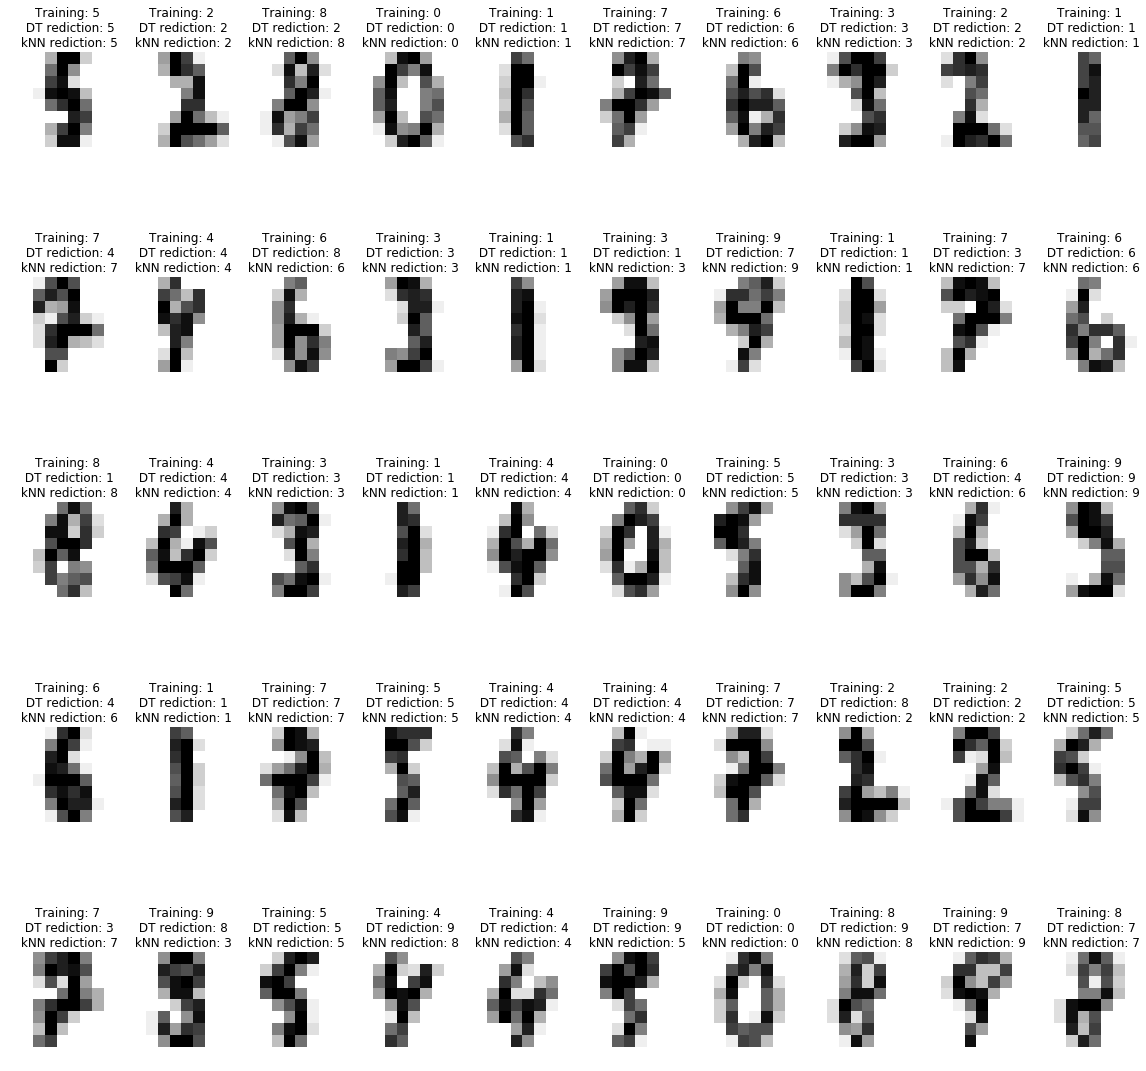

In [13]:
plt.rcParams['figure.figsize'] = [20, 20]
index = 0
for i in range(50):
    plt.subplot(5, 10, index + 1)
    plt.axis('off')
    plt.imshow(test_images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: ' + str(y_test[i]) 
              + '\n DT rediction: ' + str(predictions_dtree[i])
              + '\n kNN rediction: ' + str(predictions_knn[i]))
    index += 1

## EXCERCISE 1
1. Find the max values of `digits.data` by running `digits.data.max()`
2. Modify the value of `X_digits`: Divide `digits.data` by `digits.data.max()`
3. Find kNN and DT predictions using the new 'X_digits'.

## EXCERCISE 2
When creating your kNN model, use `n_neighbors=10` and compare the results.